In [76]:
# Imported a few necessary Library and Data
import pandas as pd # Import pandas
import numpy as np  # liner algebra
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import nltk
import nltk as nlp
import string # Import string for list of punctuation
import re
import time
import itertools
from nltk.corpus import stopwords # Import the stop word list
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

# Reading the  both data

In [2]:
Truenews = pd.read_csv("C:/Users/bhavani/Desktop/Dataset/True.csv")

In [3]:
Fakenews = pd.read_csv("C:/Users/bhavani/Desktop/Dataset/Fake.csv")

# Exploring the dataset

In [4]:
Truenews.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
Fakenews.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


# Looking into the real data has location and publisher information which is not in fake 
# To make it consistency, removing location and publisher information in real.

In [6]:
Truenews["text"] = Truenews["text"].apply(lambda x: x.partition("-")[2])

In [7]:
Truenews.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017"


In [8]:
#Checking the total NA values for each column and precent
Truenews.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [9]:
Fakenews.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [10]:
Truenews.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21190,2,716
top,Factbox: Trump fills top jobs for his administ...,Highlights for U.S. President Donald Trump’s ...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [11]:
Fakenews.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [12]:
# Counting by Subjects
Truenews.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [13]:
Fakenews.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

# Checking any empty string in both news

In [14]:
# Checking any emtpy string in True
[index for index, text in enumerate(Truenews.text.values) if str(text).strip
() == '']

[8247, 8970]

In [15]:
#Dropping the two empty rows
Truenews = Truenews.drop([8247, 8970], axis = 0)

In [16]:
# Checking empty string in Fake
emptyfake = [index for index, text in enumerate(Fakenews.text.values) if str(text).strip
() == '']
print(f"No of empty rows: {len(emptyfake)}")
Fakenews.iloc[emptyfake].tail()

No of empty rows: 630


,title,text,subject,date
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"
21873,(VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...,,left-news,"Apr 12, 2015"


In [17]:
# To get rid of 630 emptystrings in Fake, dropping it
Fn = Fakenews.drop(emptyfake)
ef = [index for index, text in enumerate(Fn.text.values) if str(text).strip
() == '']
print(f" No of empty rows now: {len(ef)}")

 No of empty rows now: 0


In [18]:
print(Truenews.shape)
print(Fn.shape)

(21415, 4)
(22851, 4)


In [19]:
# Creating a target column named 'label' in both data and concatneating them.
Truenews['category'] = 'True'
Fn['category'] = 'Fake'
combined_data = pd.concat([Truenews, Fn])

In [20]:
combined_data.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017",True


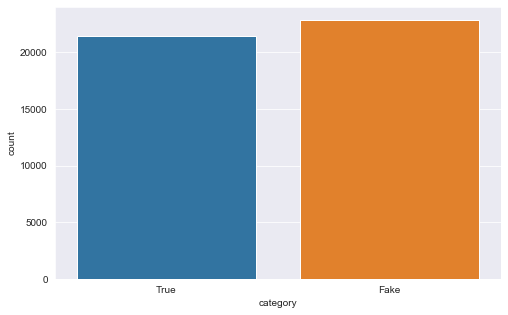

In [21]:
# plots to see whether data is balanced. Using seaborn library to plot 
#counts of true and fake.

plt.figure(figsize = (8,5))
sns.set_style("darkgrid")
sns.countplot(combined_data['category'])

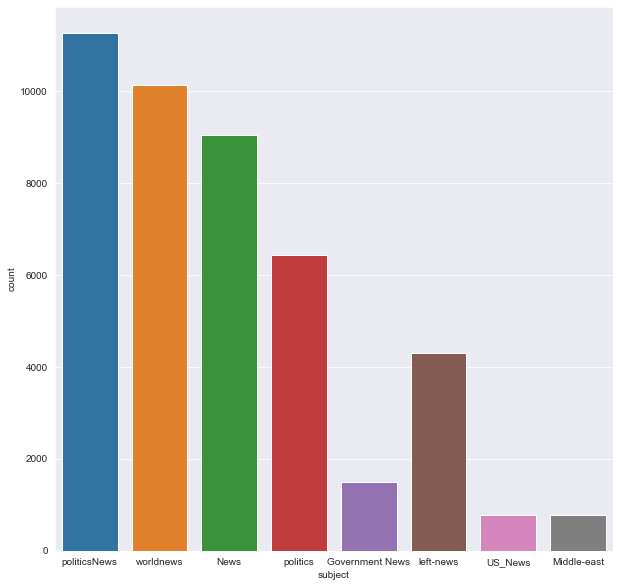

In [22]:
# Looking above the count plots showing that data are balanced
# Now examine the subjects
combined_data['subject'].value_counts()
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(combined_data['subject']);

[Text(0, 0, 'True'), Text(0, 0, 'Fake')]

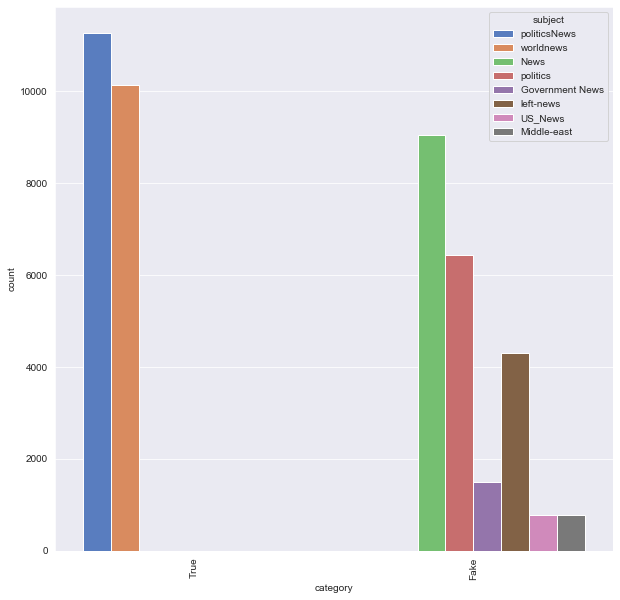

In [23]:
# The countplot is showing the largerest number of news from politicalNews.
# Lets go in detail

plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
chart = sns.countplot(x = "category", hue = "subject" , data = combined_data , palette = 'muted')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [24]:
# Looking at plot, it is clearly shows that True news belongs to two subjects.
# Let us concatenate title and text fields into one column and drop other columns.
combined_data['text'] = combined_data['title'] + " " + combined_data['text']
combined_data = combined_data.drop(['title', 'subject', 'date'], axis=1)

In [25]:
combined_data.head()

,text,category
0,"As U.S. budget fight looms, Republicans flip t...",True
1,U.S. military to accept transgender recruits o...,True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,True
3,FBI Russia probe helped by Australian diplomat...,True
4,Trump wants Postal Service to charge 'much mor...,True


In [26]:
from wordcloud import WordCloud, STOPWORDS

# Creating a word cloud to analyse the most frequent words and the stop words are removed and the word clouds are generated


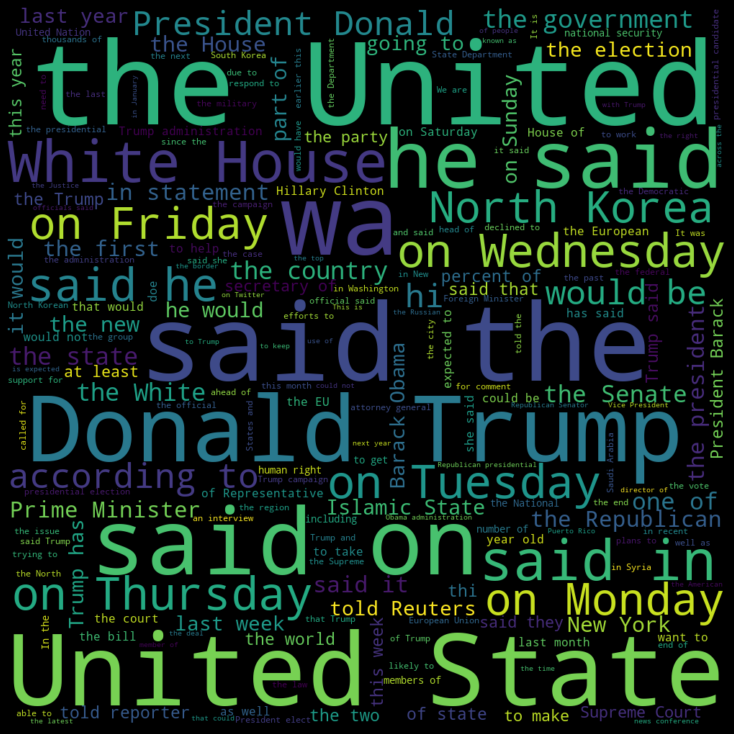

In [27]:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='black', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(combined_data[combined_data['category'] == 'True'].text)) 
  
# Wordcloud for True news data                      
plt.figure(figsize = (10, 10), facecolor = 'k', edgecolor = 'k') 
plt.imshow(wordcloud, interpolation = 'bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

# Defined additional stop words that are not contained in the dictionary.

In [28]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(10,10), 
                   title = None, title_size=20, image_color=False):
    stopwords = set(STOPWORDS)
    #define additional stop words that are not contained in the dictionary
    more_stopwords = {'one','of', 'Unknown','Hi','Hello','don','any','many','late','high','agree','become','because','will',
                     'go','going','on','said','this','would','be','the','it','to','the','as well','We','are','was','in',
                     'Monday','Tuesday','Wednesday','Thursday','Friday','dtype','wants','accept','fight','backs','helped',
                     'becomes','Mr','two'}
    stopwords = stopwords.union(more_stopwords)
    #Generate the word cloud
    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    #set the plot parameters
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud);
    plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

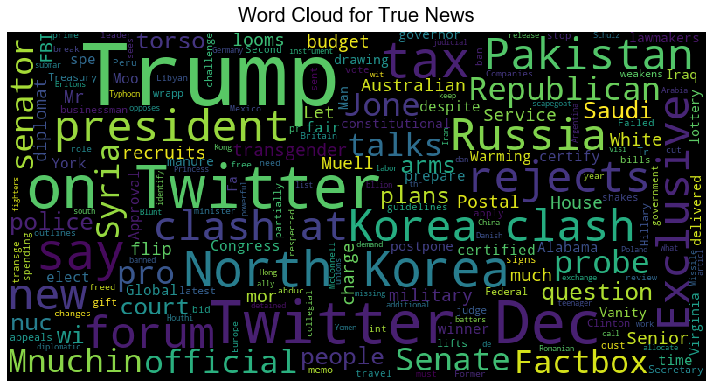

In [29]:
plot_wordcloud(combined_data[combined_data['category'] == 'True'].text, title="Word Cloud for True News")

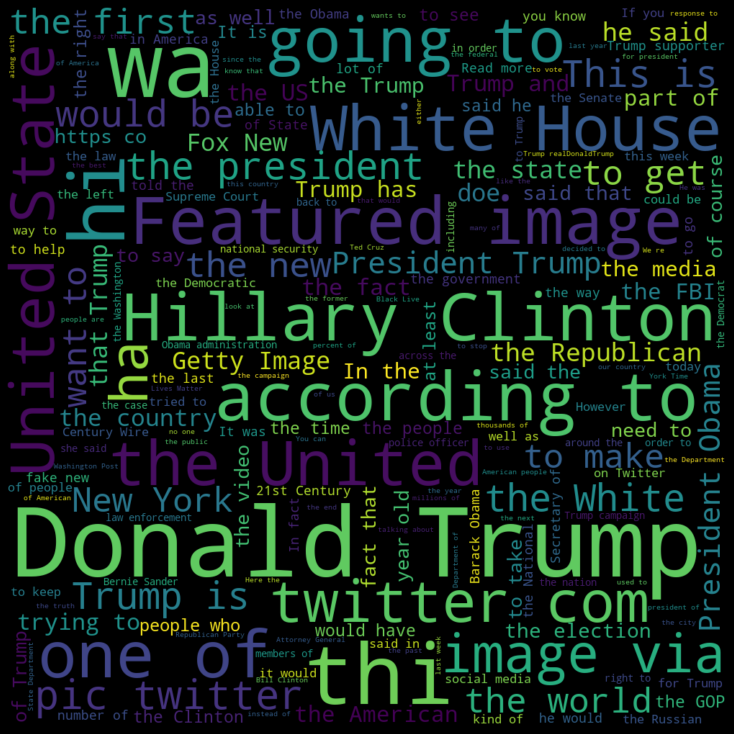

In [30]:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='black', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(combined_data[combined_data['category'] == 'Fake'].text)) 
  
# Wordcloud for fake news data                      
plt.figure(figsize = (10, 10), facecolor = 'k', edgecolor = 'k') 
plt.imshow(wordcloud, interpolation = 'bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [31]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(10,10), 
                   title = None, title_size=20, image_color=False):
    stopwords = set(STOPWORDS)
    #define additional stop words that are not contained in the dictionary
    more_stopwords = {'one','of', 'Unknown','Hi','Hello','don','any','many','late','high','agree','become','because','will',
                     'go','going','on','said','this','would','be','the','it','who','to','the','as well','We','are','was','in',
                     'Monday','Tuesday','Wednesday','Thursday','Friday','dtype','wants','accept','fight','backs','helped',
                     'becomes','Mr','two','able','american','last','back'}                 
                     
    stopwords = stopwords.union(more_stopwords)
    #Generate the word cloud
    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    #set the plot parameters
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud);
    plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

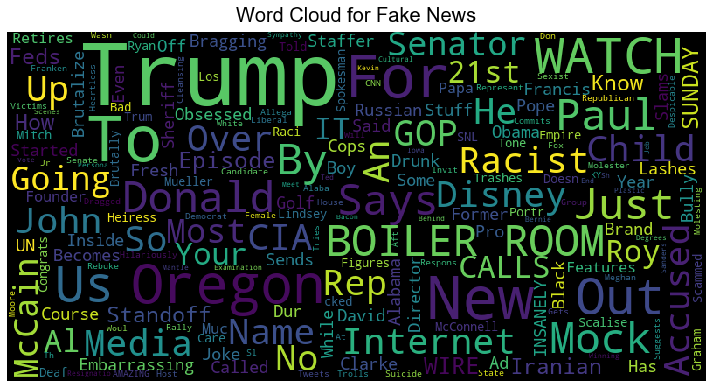

In [32]:
plot_wordcloud(combined_data[combined_data['category'] == 'Fake'].text, title="Word Cloud for Fake News")

# Cleaning the data - Already looked into NA values and cleaned the empty strings above. Further cleaning as follows:

In [33]:
# Change into lowercase
combined_data['text'] = combined_data['text'].str.lower()
# Remove punctation
combined_data['text'] = combined_data['text'].str.replace('[^\w\s]',' ')
# Remove numbers 
combined_data['text'] = combined_data['text'].str.replace('[^A-Za-z]',' ')
combined_data.sample(frac = 1)

,text,category
14616,osce watchdog slams unites states russia for ...,True
19528,breaking no charges for police officer in sho...,Fake
22107,the jack blood show from may day riots to gl...,Fake
3537,trump travel ban fight heads toward supreme co...,True
2,sheriff david clarke becomes an internet joke...,Fake
12241,peru s kuczynski says will not resign over ode...,True
334,michelle obama opens a can of whoop a on tr...,Fake
8374,sarah palin just openly admitted she prefers ...,Fake
15787,china says hopes u s can help not cause pro...,True
19315,monument to designer of ak rifle scarred by...,True


# Looking at above, our dataset is well balanced and cleaned.

In [34]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


# Tokenization - This breaks up the strings into a list of words or pieces

In [35]:
# Instantiate Tokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [36]:
combined_data['text'] = combined_data['text'].apply(lambda x: tokenizer.tokenize(x.lower()))
combined_data['text'].head(20)

0     [as, u, s, budget, fight, looms, republicans, ...
1     [u, s, military, to, accept, transgender, recr...
2     [senior, u, s, republican, senator, let, mr, m...
3     [fbi, russia, probe, helped, by, australian, d...
4     [trump, wants, postal, service, to, charge, mu...
5     [white, house, congress, prepare, for, talks, ...
6     [trump, says, russia, probe, will, be, fair, b...
7     [factbox, trump, on, twitter, dec, approval, r...
8     [trump, on, twitter, dec, global, warming, tog...
9     [alabama, official, to, certify, senator, elec...
10    [jones, certified, u, s, senate, winner, despi...
11    [new, york, governor, questions, the, constitu...
12    [factbox, trump, on, twitter, dec, vanity, fai...
13    [trump, on, twitter, dec, trump, iraq, syria, ...
14    [man, says, he, delivered, manure, to, mnuchin...
15    [virginia, officials, postpone, lottery, drawi...
16    [u, s, lawmakers, question, businessman, at, t...
17    [trump, on, twitter, dec, hillary, clinton

In [37]:
def cleaning(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    words = re.sub(r'[^\w\s]', '', text).split()
    return[wnl.lemmatize(word) for word in words if word not in stopwords]
    

 # Lemmatization -  Shorten words back to their root form and always returns a proper word that can be found in the dictionary.

In [38]:
#Instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

In [39]:
def word_lemmatizer(text):
    lem_text = ([lemmatizer.lemmatize(i) for i in text])
    return lem_text

In [40]:
combined_data['text'] = combined_data['text'].apply(lambda x: word_lemmatizer(x))
combined_data['text'].head(20)

0     [a, u, s, budget, fight, loom, republican, fli...
1     [u, s, military, to, accept, transgender, recr...
2     [senior, u, s, republican, senator, let, mr, m...
3     [fbi, russia, probe, helped, by, australian, d...
4     [trump, want, postal, service, to, charge, muc...
5     [white, house, congress, prepare, for, talk, o...
6     [trump, say, russia, probe, will, be, fair, bu...
7     [factbox, trump, on, twitter, dec, approval, r...
8     [trump, on, twitter, dec, global, warming, tog...
9     [alabama, official, to, certify, senator, elec...
10    [jones, certified, u, s, senate, winner, despi...
11    [new, york, governor, question, the, constitut...
12    [factbox, trump, on, twitter, dec, vanity, fai...
13    [trump, on, twitter, dec, trump, iraq, syria, ...
14    [man, say, he, delivered, manure, to, mnuchin,...
15    [virginia, official, postpone, lottery, drawin...
16    [u, s, lawmaker, question, businessman, at, tr...
17    [trump, on, twitter, dec, hillary, clinton

In [41]:
#Instantiate Stemmer
stemmer = PorterStemmer()

In [42]:
def word_stemmer(text):
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return stem_text

In [43]:
combined_data['text'] = combined_data['text'].apply(lambda x: word_stemmer(x))
combined_data['text'].head(20)

0     a u s budget fight loom republican flip their ...
1     u s militari to accept transgend recruit on mo...
2     senior u s republican senat let mr mueller do ...
3     fbi russia probe help by australian diplomat t...
4     trump want postal servic to charg much more fo...
5     white hous congress prepar for talk on spend i...
6     trump say russia probe will be fair but timeli...
7     factbox trump on twitter dec approv rate amazo...
8     trump on twitter dec global warm togeth we are...
9     alabama offici to certifi senat elect jone tod...
10    jone certifi u s senat winner despit moor chal...
11    new york governor question the constitution of...
12    factbox trump on twitter dec vaniti fair hilla...
13    trump on twitter dec trump iraq syria on the d...
14    man say he deliv manur to mnuchin to protest n...
15    virginia offici postpon lotteri draw to decid ...
16    u s lawmak question businessman at trump tower...
17    trump on twitter dec hillari clinton tax c

In [44]:
Truenews_words = cleaning(''.join(str(Truenews['text'].tolist())))

# N-gram Analysis

In [45]:
# N-gram for Truenews
Truenews_words_bigrams_series = (pd.Series(nltk.ngrams(Truenews_words, 2)).value_counts())[:15]

Text(0.5, 0, '# of Occurances')

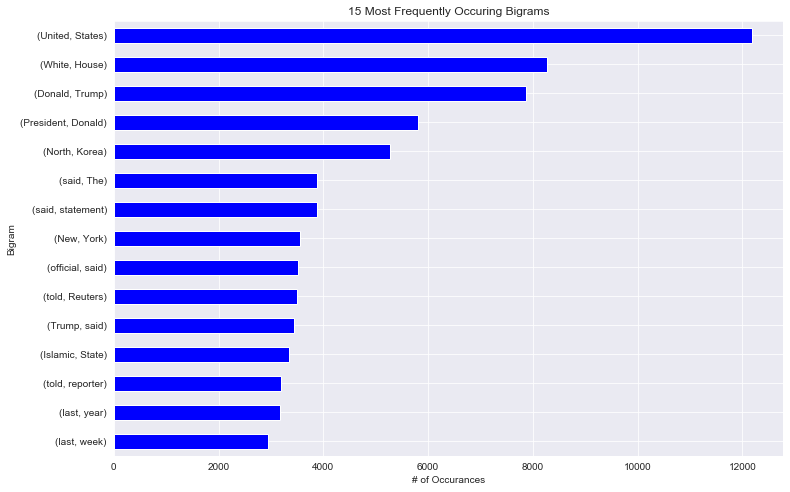

In [46]:
# Truenews - Bigram
Truenews_words_bigrams_series.sort_values().plot.barh(color='blue', width=.5, figsize=(12, 8))
plt.title('15 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')


Text(0.5, 0, '# of Occurances')

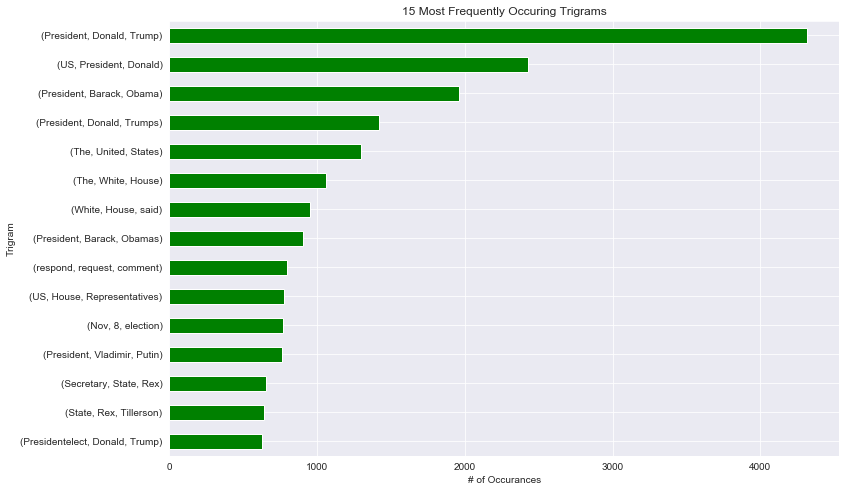

In [47]:
# Truenews - Trigram
Truenews_words_trigrams_series = (pd.Series(nltk.ngrams(Truenews_words, 3)).value_counts())[:15]
Truenews_words_trigrams_series.sort_values().plot.barh(color='green', width=.5, figsize=(12, 8))
plt.title('15 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [48]:
Fakenews_words = cleaning(''.join(str(Fakenews['text'].tolist())))

In [49]:
# N gram - Fake news
Fakenews_words_bigrams_series = (pd.Series(nltk.ngrams(Fakenews_words, 2)).value_counts())[:15]

Text(0.5, 0, '# of Occurances')

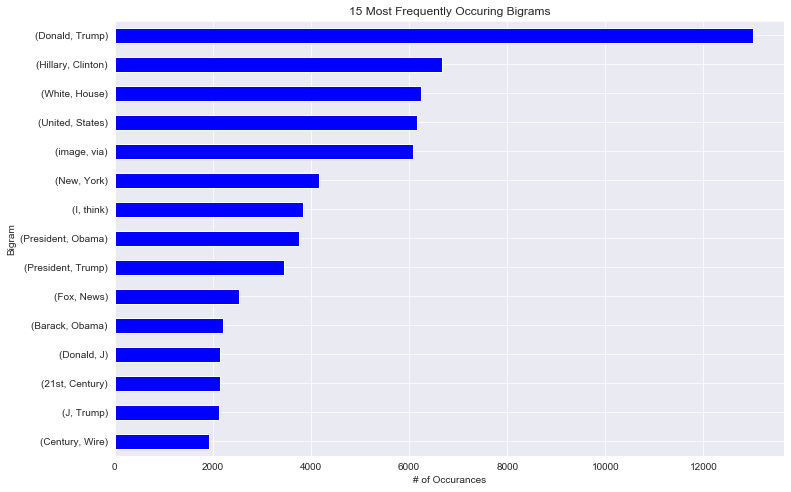

In [50]:
#Bigram for Fake news
Fakenews_words_bigrams_series.sort_values().plot.barh(color='blue', width=.5, figsize=(12, 8))
plt.title('15 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

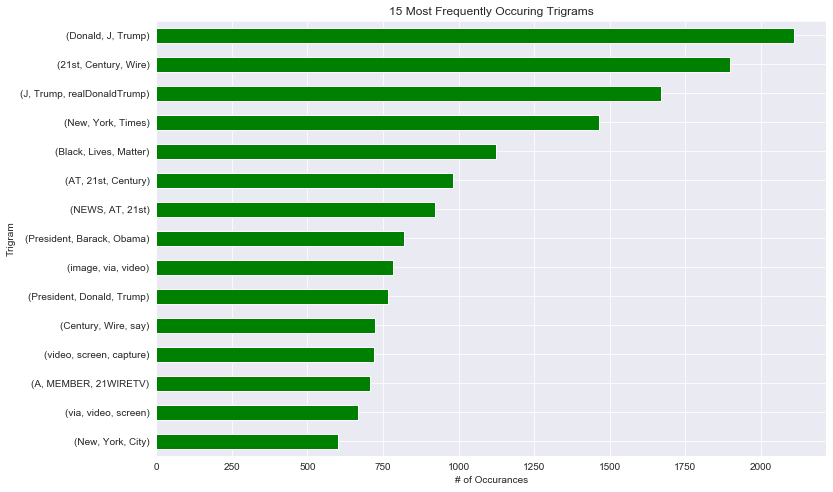

In [51]:
# Trigram for fake news
Fakenews_words_trigrams_series = (pd.Series(nltk.ngrams(Fakenews_words, 3)).value_counts())[:15]
Fakenews_words_trigrams_series.sort_values().plot.barh(color='green', width=.5, figsize=(12, 8))
plt.title('15 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

# Full Dataset Analysis

In [52]:
fullwords = cleaning(''.join(str(combined_data['text'].tolist())))

In [53]:
# Bi-gram for full data
bigrams_series = (pd.Series(nltk.ngrams(fullwords, 2)).value_counts())[:15]

Text(0.5, 0, '# of Occurances')

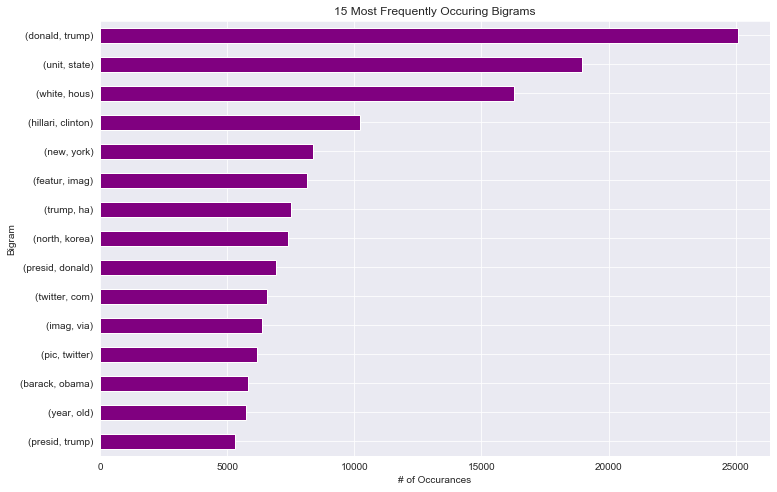

In [54]:
bigrams_series.sort_values().plot.barh(color='purple', width=.5, figsize=(12, 8))
plt.title('15 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [55]:
# Trigram for full data
trigrams_series = (pd.Series(nltk.ngrams(fullwords, 3)).value_counts())[:15]

Text(0.5, 0, '# of Occurances')

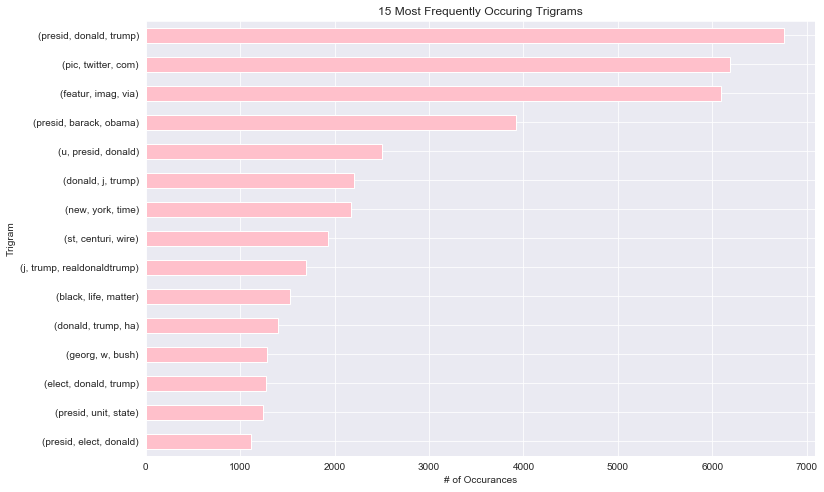

In [56]:
trigrams_series.sort_values().plot.barh(color='pink', width=.5, figsize=(12, 8))
plt.title('15 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [57]:
#Encode the label which are in categorical form
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
combined_data["label"] = le1.fit_transform(combined_data.category)

In [58]:
le1.inverse_transform([0,1])

array(['Fake', 'True'], dtype=object)

In [59]:
combined_data['text'][100]

100    senat warren hit out at effort to politic u s ...
100    watch joe biden just wreck trump in six word a...
Name: text, dtype: object

In [60]:
from sklearn.naive_bayes import MultinomialNB

# Split the data

In [61]:
# Split the data into X and Y
X = combined_data.text
Y = combined_data.label

In [62]:
#split the data in test and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=53)

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

In [64]:
count_train = count_vectorizer.fit_transform(X_train)

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_df=0.7)

# Multinomial Naive Bayes

In [105]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())])

model = pipeline.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 93.0%


In [106]:
# Print a classification report
print(f"Classification Report: \n {classification_report(y_test,prediction)}")

print(f"\n Confusion matrix: \n {confusion_matrix(y_test,prediction)}")

#overa all accuracy 
print(f"\n Over all Accuracy of the Model: \n {accuracy_score(y_test,prediction)}")

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      7433
           1       0.95      0.91      0.93      7175

    accuracy                           0.93     14608
   macro avg       0.93      0.93      0.93     14608
weighted avg       0.93      0.93      0.93     14608


 Confusion matrix: 
 [[7069  364]
 [ 658 6517]]

 Over all Accuracy of the Model: 
 0.9300383351588171


# Support Vector Machine

In [107]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', LinearSVC())])
model = pipeline.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.02%


In [108]:
# Print a classification report
print(f"Classification Report: \n {classification_report(y_test,prediction)}")

print(f"\n Confusion matrix: \n {confusion_matrix(y_test,prediction)}")

#overa all accuracy 
print(f"\n Over all Accuracy of the Model: \n {accuracy_score(y_test,prediction)}")

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7433
           1       0.99      0.99      0.99      7175

    accuracy                           0.99     14608
   macro avg       0.99      0.99      0.99     14608
weighted avg       0.99      0.99      0.99     14608


 Confusion matrix: 
 [[7366   67]
 [  76 7099]]

 Over all Accuracy of the Model: 
 0.990210843373494


# Logistic Regression

In [87]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression())])
model = pipeline.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

C:\Users\bhavani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy: 98.18%


In [102]:
# Print a classification report
print(f"Classification Report: \n {classification_report(y_test,prediction)}")

print(f"\n Confusion matrix: \n {confusion_matrix(y_test,prediction)}")

#overa all accuracy 
print(f"\n Over all Accuracy of the Model: \n {accuracy_score(y_test,prediction)}")

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      7433
           1       0.98      0.98      0.98      7175

    accuracy                           0.98     14608
   macro avg       0.98      0.98      0.98     14608
weighted avg       0.98      0.98      0.98     14608


 Confusion matrix: 
 [[7285  148]
 [ 118 7057]]

 Over all Accuracy of the Model: 
 0.9817907995618839
